# Simple Classifier with PyTorch
We will have a look on how to use PyTorch with the Iris data set. We will create and train a neural network with Linear layers and we will employ a 
* __Softmax activation function__: a generalization of the logistic function to multiple dimensions
* and __Adam__ optmizer: it is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.


## Data Preparation
To prepare the data, we will use a StandardScaler to remove the mean and scale the features to unit variance. Finally we want to perform a train test split to compare our results later on.

In [22]:
import numpy as np
import pandas as pd


In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

In [24]:
names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_scaled.shape

(150, 4)

In [30]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [31]:
# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42)

In [32]:
X_train.shape

(100, 4)

## Visualize the Data
Let’s take a look at our data to see what we are dealing with. We're going to use a scattery plot to show the X distribution across the three categories, relying on matplotlib pyplot library

In [33]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Let's draw a chart made of two plots with subplots function

`subplots(num_rows, num_cols, figsize=(width_inches, height_inches))`

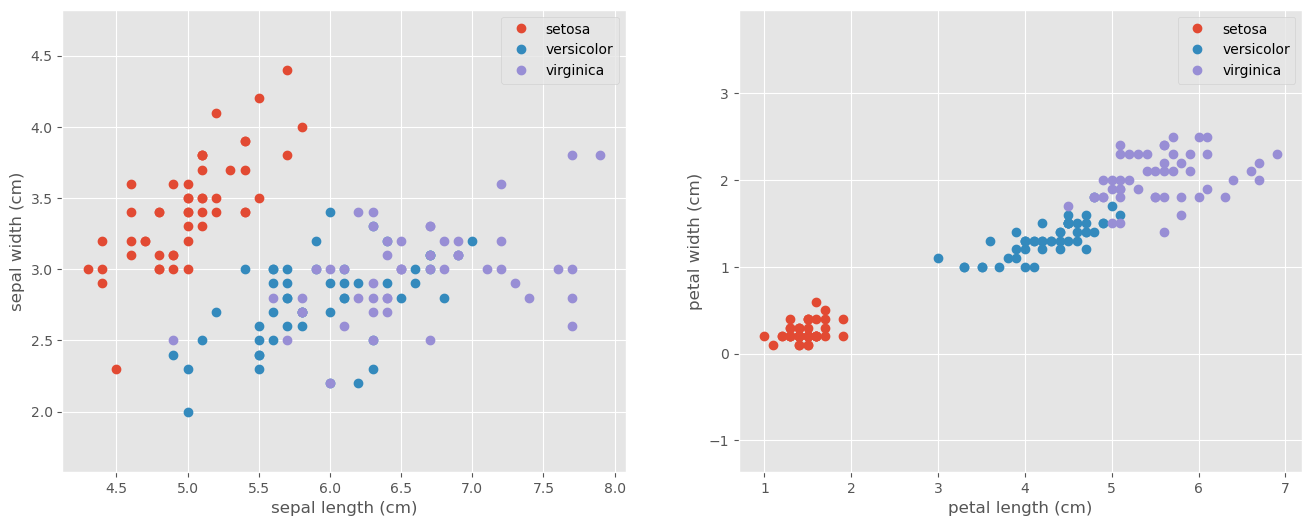

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for target, target_name in enumerate(names): # 0 setosa
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal') #scaled as alternative
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();

To get a quick visualization of the data let’s plot the scatter plots of each pair of features and the histograms for each feature. To achieve this representation I used the `pandas.plotting.scatter_matrix` function 

In [35]:
df = pd.DataFrame({k:X[:,i] for i,k in enumerate(iris['feature_names'])})
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\abelli\AppData\Local\Temp\ipykernel_26648\3551048541.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(df, figsize=(12,12), c=y, s=200, alpha=1, ax=ax);


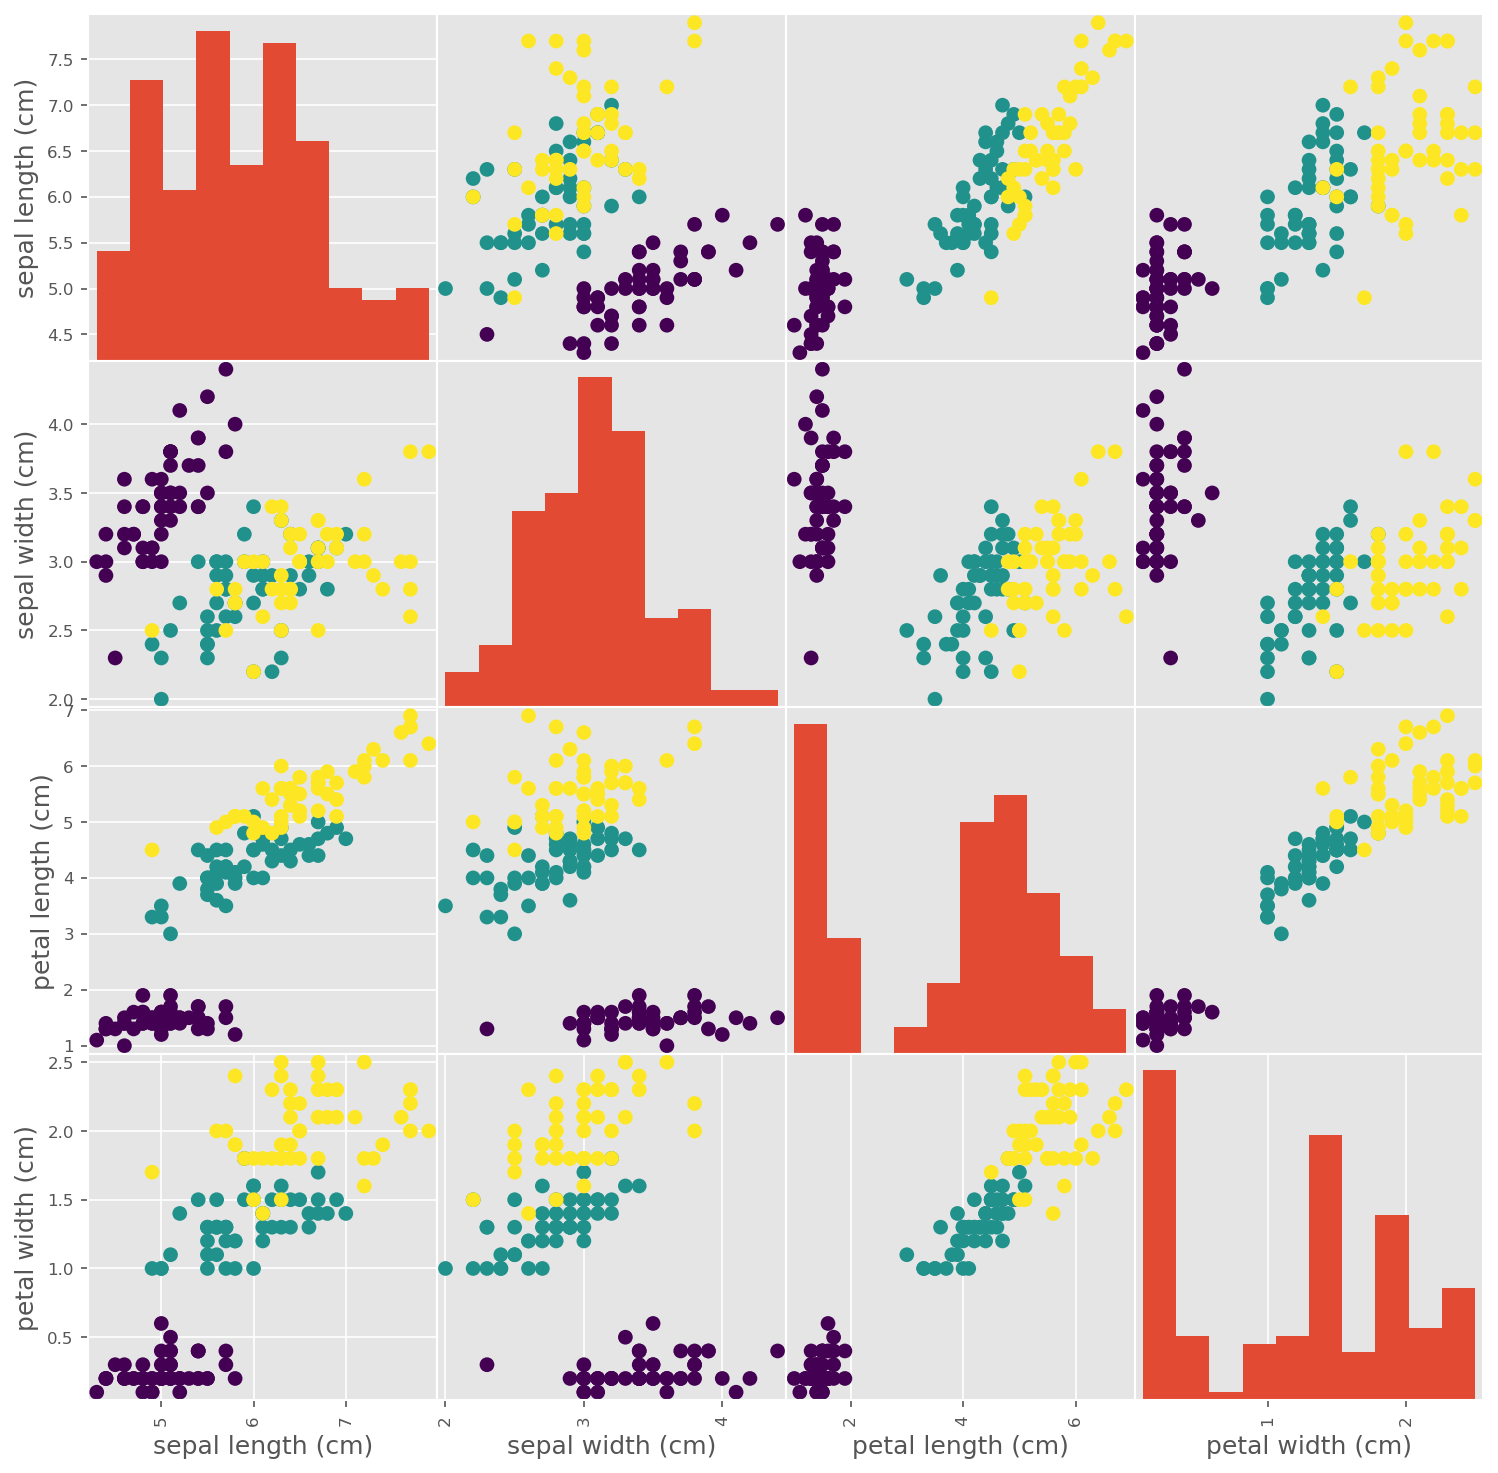

In [36]:
fig, ax = plt.subplots(figsize=(12,12), dpi=150)

pd.plotting.scatter_matrix(df, figsize=(12,12), c=y, s=200, alpha=1, ax=ax);

## Configure Neural Network Models


In [37]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
from torchinfo import summary

In [38]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [39]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

model     = Model(X_train.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
print(model)

Using cpu device
Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)


In [40]:
summary(model)

Layer (type:depth-idx)                   Param #
Model                                    --
├─Linear: 1-1                            250
├─Linear: 1-2                            2,550
├─Linear: 1-3                            153
Total params: 2,953
Trainable params: 2,953
Non-trainable params: 0

## Train the Model
Now its time to run the training. In order to track progress more efficiently, we can use tqdm, which is a great and easy to use progress bar for our training epochs.

In [41]:
import tqdm

EPOCHS  = 250
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()
        print("epoch ["+str(epoch)+"] - accuracy: "+ str(accuracy_list[epoch]) )

 16%|█████████████                                                                   | 41/250 [00:00<00:00, 399.12it/s]

epoch [0] - accuracy: 0.05999999865889549
epoch [1] - accuracy: 0.2800000011920929
epoch [2] - accuracy: 0.5600000023841858
epoch [3] - accuracy: 0.6399999856948853
epoch [4] - accuracy: 0.6600000262260437
epoch [5] - accuracy: 0.699999988079071
epoch [6] - accuracy: 0.699999988079071
epoch [7] - accuracy: 0.699999988079071
epoch [8] - accuracy: 0.699999988079071
epoch [9] - accuracy: 0.699999988079071
epoch [10] - accuracy: 0.699999988079071
epoch [11] - accuracy: 0.699999988079071
epoch [12] - accuracy: 0.699999988079071
epoch [13] - accuracy: 0.699999988079071
epoch [14] - accuracy: 0.699999988079071
epoch [15] - accuracy: 0.699999988079071
epoch [16] - accuracy: 0.699999988079071
epoch [17] - accuracy: 0.699999988079071
epoch [18] - accuracy: 0.699999988079071
epoch [19] - accuracy: 0.699999988079071
epoch [20] - accuracy: 0.699999988079071
epoch [21] - accuracy: 0.699999988079071
epoch [22] - accuracy: 0.699999988079071
epoch [23] - accuracy: 0.7400000095367432
epoch [24] - accura

 47%|████████████████████████████████████▉                                          | 117/250 [00:00<00:00, 339.32it/s]

epoch [77] - accuracy: 0.8799999952316284
epoch [78] - accuracy: 0.8799999952316284
epoch [79] - accuracy: 0.8799999952316284
epoch [80] - accuracy: 0.8799999952316284
epoch [81] - accuracy: 0.8999999761581421
epoch [82] - accuracy: 0.8999999761581421
epoch [83] - accuracy: 0.8999999761581421
epoch [84] - accuracy: 0.8999999761581421
epoch [85] - accuracy: 0.8999999761581421
epoch [86] - accuracy: 0.8999999761581421
epoch [87] - accuracy: 0.8999999761581421
epoch [88] - accuracy: 0.8999999761581421
epoch [89] - accuracy: 0.9200000166893005
epoch [90] - accuracy: 0.9200000166893005
epoch [91] - accuracy: 0.9399999976158142
epoch [92] - accuracy: 0.9399999976158142
epoch [93] - accuracy: 0.9399999976158142
epoch [94] - accuracy: 0.9399999976158142
epoch [95] - accuracy: 0.9399999976158142
epoch [96] - accuracy: 0.9399999976158142
epoch [97] - accuracy: 0.9399999976158142
epoch [98] - accuracy: 0.9599999785423279
epoch [99] - accuracy: 0.9800000190734863
epoch [100] - accuracy: 0.98000001

 61%|████████████████████████████████████████████████                               | 152/250 [00:00<00:00, 336.19it/s]

epoch [148] - accuracy: 0.9800000190734863
epoch [149] - accuracy: 0.9800000190734863
epoch [150] - accuracy: 0.9800000190734863
epoch [151] - accuracy: 0.9800000190734863
epoch [152] - accuracy: 0.9800000190734863
epoch [153] - accuracy: 0.9800000190734863
epoch [154] - accuracy: 0.9800000190734863
epoch [155] - accuracy: 0.9800000190734863
epoch [156] - accuracy: 0.9800000190734863
epoch [157] - accuracy: 0.9800000190734863
epoch [158] - accuracy: 0.9800000190734863
epoch [159] - accuracy: 0.9800000190734863
epoch [160] - accuracy: 0.9800000190734863
epoch [161] - accuracy: 0.9800000190734863
epoch [162] - accuracy: 0.9800000190734863
epoch [163] - accuracy: 0.9800000190734863
epoch [164] - accuracy: 0.9800000190734863
epoch [165] - accuracy: 0.9800000190734863
epoch [166] - accuracy: 0.9800000190734863
epoch [167] - accuracy: 0.9800000190734863
epoch [168] - accuracy: 0.9800000190734863
epoch [169] - accuracy: 0.9800000190734863
epoch [170] - accuracy: 0.9800000190734863
epoch [171]

 74%|██████████████████████████████████████████████████████████▊                    | 186/250 [00:00<00:00, 319.44it/s]

epoch [185] - accuracy: 0.9800000190734863
epoch [186] - accuracy: 0.9800000190734863
epoch [187] - accuracy: 0.9800000190734863
epoch [188] - accuracy: 0.9800000190734863
epoch [189] - accuracy: 0.9800000190734863
epoch [190] - accuracy: 0.9800000190734863
epoch [191] - accuracy: 0.9800000190734863
epoch [192] - accuracy: 0.9800000190734863
epoch [193] - accuracy: 0.9800000190734863
epoch [194] - accuracy: 0.9800000190734863
epoch [195] - accuracy: 0.9800000190734863
epoch [196] - accuracy: 0.9800000190734863
epoch [197] - accuracy: 0.9800000190734863
epoch [198] - accuracy: 0.9800000190734863
epoch [199] - accuracy: 0.9800000190734863
epoch [200] - accuracy: 0.9800000190734863
epoch [201] - accuracy: 0.9800000190734863
epoch [202] - accuracy: 0.9800000190734863
epoch [203] - accuracy: 0.9800000190734863
epoch [204] - accuracy: 0.9800000190734863
epoch [205] - accuracy: 0.9800000190734863
epoch [206] - accuracy: 0.9800000190734863
epoch [207] - accuracy: 0.9800000190734863
epoch [208]

100%|███████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 324.89it/s]

epoch [210] - accuracy: 0.9800000190734863
epoch [211] - accuracy: 0.9800000190734863
epoch [212] - accuracy: 0.9800000190734863
epoch [213] - accuracy: 0.9800000190734863
epoch [214] - accuracy: 0.9800000190734863
epoch [215] - accuracy: 0.9800000190734863
epoch [216] - accuracy: 0.9800000190734863
epoch [217] - accuracy: 0.9800000190734863
epoch [218] - accuracy: 0.9800000190734863
epoch [219] - accuracy: 0.9800000190734863
epoch [220] - accuracy: 0.9800000190734863
epoch [221] - accuracy: 0.9800000190734863
epoch [222] - accuracy: 0.9800000190734863
epoch [223] - accuracy: 0.9800000190734863
epoch [224] - accuracy: 0.9800000190734863
epoch [225] - accuracy: 0.9800000190734863
epoch [226] - accuracy: 0.9800000190734863
epoch [227] - accuracy: 0.9800000190734863
epoch [228] - accuracy: 0.9800000190734863
epoch [229] - accuracy: 0.9800000190734863
epoch [230] - accuracy: 0.9800000190734863
epoch [231] - accuracy: 0.9800000190734863
epoch [232] - accuracy: 0.9800000190734863
epoch [233]

## Plot Accuracy and Loss from Training
Let’s have a look how our models perform. We can clearly see that adding more nodes makes the training perform better.

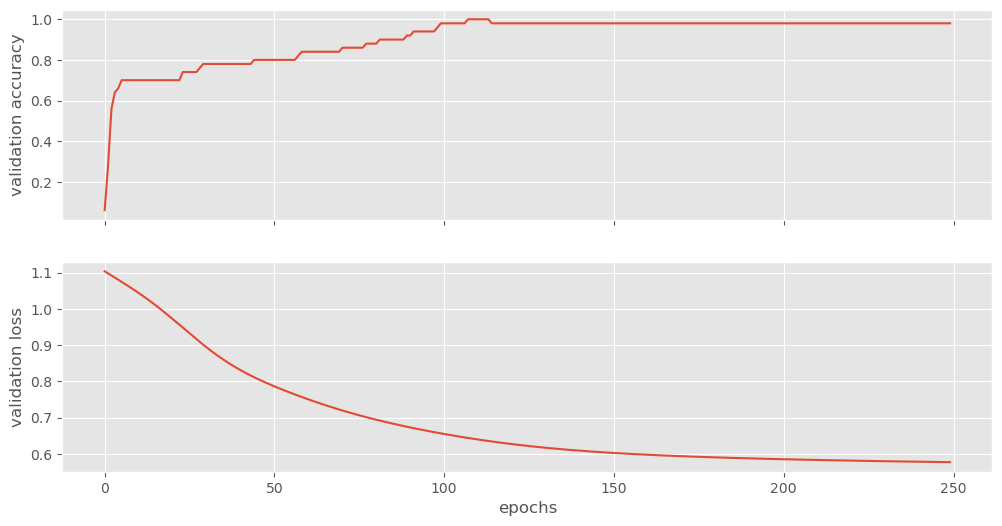

In [42]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

## Show ROC Curve
We can compare now with the Receiver Operating Characteristic (ROC) how well the models perform. 

The ROC plot compares the false positive rate with the true positive rate.

We additionally compute for each model the Area under the curve (AUC), where auc = 1 is perfect classification and auc = 0.5 is random guessing (for a two class problem). 

To prepare the test data, we need to use the OneHotEncoder to encode the integer features into a One-hot vector which we then flatten with numpy.ravel() for sklearn.metrics.roc_curve().

In [49]:
enc = OneHotEncoder()
Y_onehot = enc.fit_transform(y_test[:, np.newaxis]).toarray()
print (Y_onehot)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


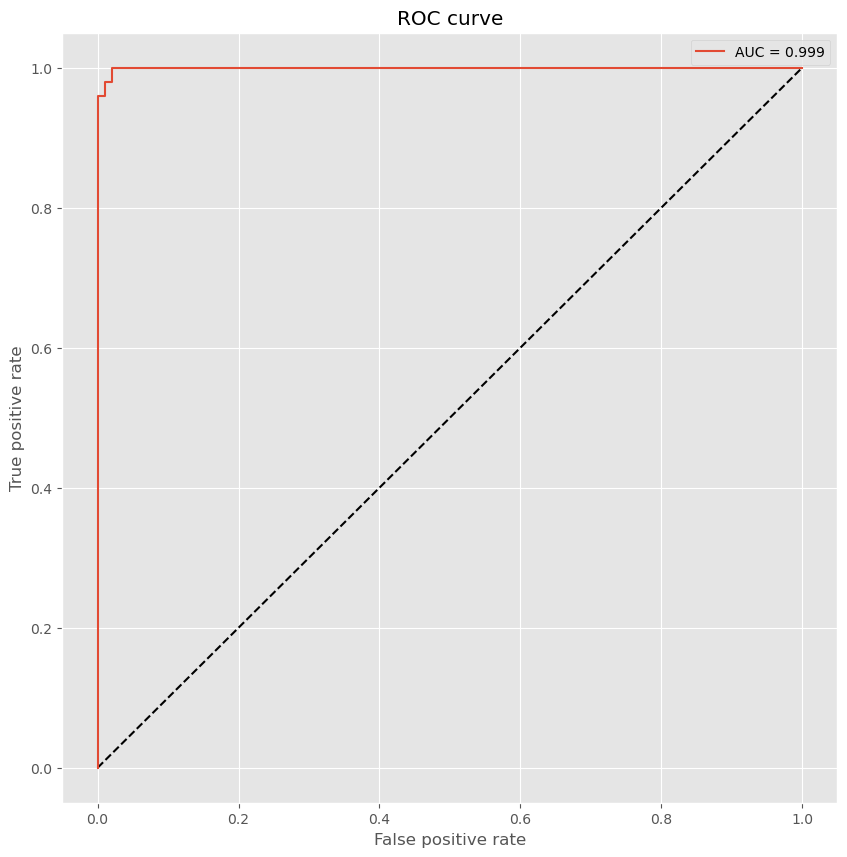

In [50]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

# One hot encoding


with torch.no_grad():
    y_pred = model(X_test).numpy()
    fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())

        
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();
